In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [70]:
df = pd.read_csv('legs2.csv')

In [71]:
df[df['class']=='1']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,1,0.039570,-0.567787,-0.257545,0.999998,0.043327,-0.604154,-0.240470,0.999997,0.043676,...,-0.220475,0.953017,0.292999,0.660746,-0.384417,0.996053,-0.122886,0.699967,-0.368827,0.994110
1,1,0.039004,-0.565416,-0.281327,0.999998,0.041631,-0.602813,-0.265975,0.999997,0.041999,...,-0.220160,0.952492,0.273050,0.643692,-0.383286,0.995981,-0.125977,0.659915,-0.368469,0.993931
2,1,0.039426,-0.561629,-0.284335,0.999998,0.041693,-0.599967,-0.269040,0.999997,0.042064,...,-0.225537,0.951611,0.267971,0.632823,-0.384510,0.995890,-0.126485,0.646659,-0.373699,0.993666
3,1,0.039566,-0.557739,-0.297830,0.999998,0.041760,-0.596768,-0.282646,0.999996,0.042131,...,-0.226616,0.951067,0.269043,0.635299,-0.370575,0.995757,-0.127345,0.649464,-0.374567,0.993527
4,1,0.039567,-0.556682,-0.297843,0.999998,0.041675,-0.595925,-0.282617,0.999996,0.042046,...,-0.226501,0.950253,0.267882,0.634647,-0.370522,0.995655,-0.127405,0.644297,-0.374488,0.993341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6241,1,0.016124,-0.575379,-0.304474,0.998600,0.021014,-0.613406,-0.288696,0.997064,0.021720,...,-0.034580,0.002920,0.321504,0.019243,-0.222952,0.001570,-0.017002,-0.211147,-0.416658,0.001842
6242,1,0.016185,-0.577059,-0.292252,0.998709,0.021096,-0.615299,-0.274426,0.997282,0.021802,...,-0.039651,0.002629,0.315388,0.040433,-0.222015,0.001416,-0.015708,-0.197609,-0.423812,0.001660
6243,1,0.015414,-0.577396,-0.293026,0.998817,0.020439,-0.615592,-0.275745,0.997494,0.021103,...,-0.038086,0.002367,0.325825,-0.002948,-0.218240,0.001276,-0.013637,-0.229144,-0.428026,0.001496
6244,1,0.015464,-0.577602,-0.287345,0.998912,0.020491,-0.615704,-0.272779,0.997688,0.021157,...,-0.063344,0.002132,0.324135,-0.013504,-0.255962,0.001151,-0.014629,-0.220796,-0.448038,0.001347


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Columns: 133 entries, class to v33
dtypes: float64(132), object(1)
memory usage: 6.4+ MB


In [73]:
X = df.drop('class', axis=1) # features: 동작 이름을 제외한 모든 항목
y = df['class'] # target value

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [75]:
y_test

4689      2
3376    6_1
1126    3_1
2287    5_1
1325    3_1
       ... 
257       1
623       2
2949    5_2
60        1
1490    3_2
Name: class, Length: 1904, dtype: object

In [76]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [77]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [78]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [79]:
fit_models['lr'].predict(X_test)

array(['2', '6_1', '3_1', ..., '5_2', '1', '3_2'], dtype=object)

## Evaluating the Models

In [80]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [81]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9984243697478992
rc 0.9842436974789915
rf 0.9994747899159664
gb 0.9984243697478992


In [66]:
y_test

419       1
2417    4_2
368       1
2191    4_2
5200      2
       ... 
726       2
698       2
2645    3_2
646       2
5261      2
Name: class, Length: 1666, dtype: object

In [67]:
with open('waist2.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [68]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix')

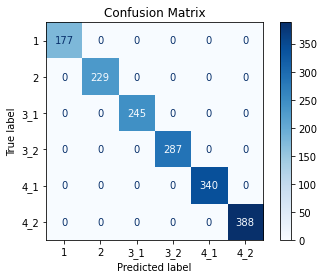

In [69]:
label=['1','2','3_1','3_2','4_1','4_2'] #waist
# label=['1','2','3_1','3_2','4','5_1','5_2','6_1','6_2','6_3'] # legs라벨 설정
plot = plot_confusion_matrix(fit_models['rf'], # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')